# Analysis and visualization of Stereo-seq mouse brain data

In [2]:
# ## tutorial
# https://scanpy-tutorials.readthedocs.io/en/latest/spatial/basic-analysis.html

In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [4]:
adata=sc.read("../data/spf_mouse_brain_bin100_raw.h5ad")
adata

AnnData object with n_obs × n_vars = 20347 × 26966
    obs: 'orig.ident', 'x', 'y'
    uns: 'sn'
    obsm: 'spatial'

In [5]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("Mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [6]:
adata

AnnData object with n_obs × n_vars = 20347 × 26966
    obs: 'orig.ident', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'sn'
    obsm: 'spatial'

## QC and preprocessing

In [7]:
# fig, axs = plt.subplots(1, 4, figsize=(15, 4))
# sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
# sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
# sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
# sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

### filter spots with barcodes

In [8]:
adata.obs['bin100_x'] = (adata.obs['x']/100).astype(np.int32) *100
adata.obs['bin100_y'] = (adata.obs['y']/100).astype(np.int32) *100
adata.obs['barcodes'] = adata.obs['bin100_x'].astype('str') + '-' + adata.obs['bin100_y'].astype('str')
adata.obs.head()

,orig.ident,x,y,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,bin100_x,bin100_y,barcodes
132_43,sample,19775,7275,4115,8.322637,11378.0,9.339525,13.675514,19.458604,27.948673,43.918088,0.0,0.0,0.0,19700,7200,19700-7200
91_6,sample,15675,3575,1941,7.571474,3927.0,8.275886,20.015279,27.119939,37.356761,56.913675,0.0,0.0,0.0,15600,3500,15600-3500
96_109,sample,16175,13875,2450,7.804251,5847.0,8.673855,21.942877,29.040534,38.635198,56.131349,0.0,0.0,0.0,16100,13800,16100-13800
69_21,sample,13475,5075,3899,8.268732,10698.0,9.277906,13.890447,19.807441,28.201533,44.251262,0.0,0.0,0.0,13400,5000,13400-5000
109_22,sample,17475,5175,4109,8.321178,11953.0,9.388821,12.758303,18.572743,27.139630,43.361499,0.0,0.0,0.0,17400,5100,17400-5100


In [9]:
barcodes = pd.read_csv('mouse_brain_barcodes_filt_barcodes.csv', index_col=0)
print(barcodes.shape)
barcodes.head()

(19552, 1)


,x
1,7100-11300
2,7500-9300
3,7900-11600
4,8000-12400
5,8300-15800


In [10]:
adata = adata[adata.obs['barcodes'].isin(barcodes['x'].tolist())]
adata

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


View of AnnData object with n_obs × n_vars = 19552 × 26966
    obs: 'orig.ident', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'bin100_x', 'bin100_y', 'barcodes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'sn'
    obsm: 'spatial'

Trying to set attribute `.obs` of view, copying.


(5690.0, 25160.0, 2230.0, 18620.0)

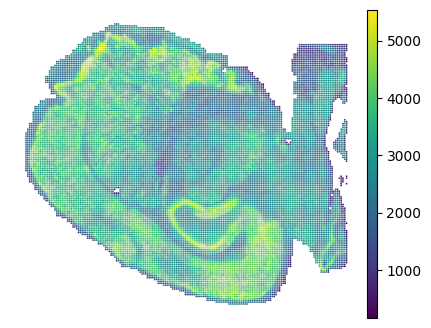

In [11]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
plt.rcParams["figure.figsize"] = (5,4)
sc.pl.embedding(adata, basis="spatial", color="n_genes_by_counts", show=False)
plt.title("")
plt.axis('off')

In [12]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

## Manifold embedding and clustering based on transcriptional similarity

In [13]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

2023-04-12 07:23:22.809694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 07:23:22.925291: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-12 07:23:22.929303: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-12 07:23:22.929318: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

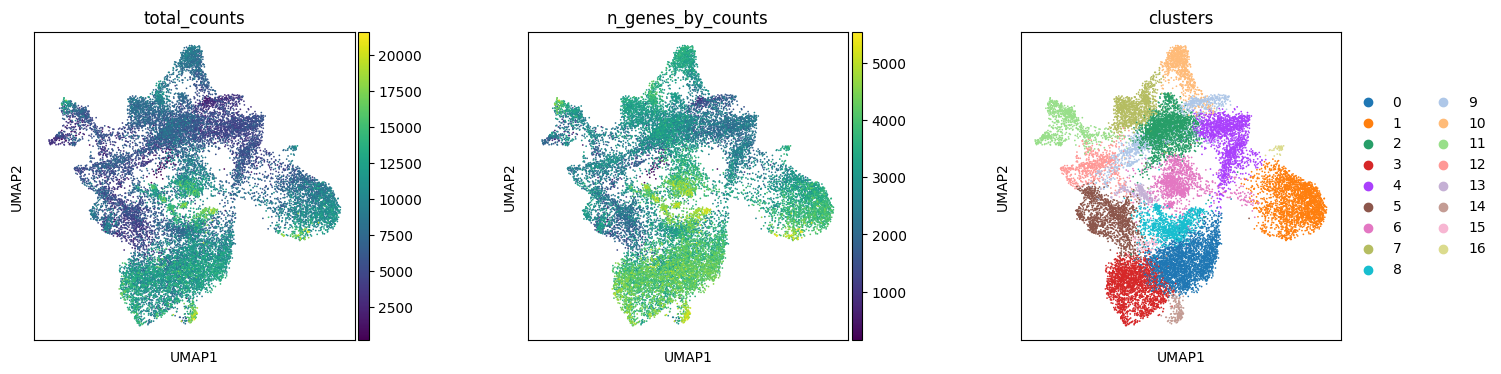

In [14]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

## Visualization in spatial coordinates

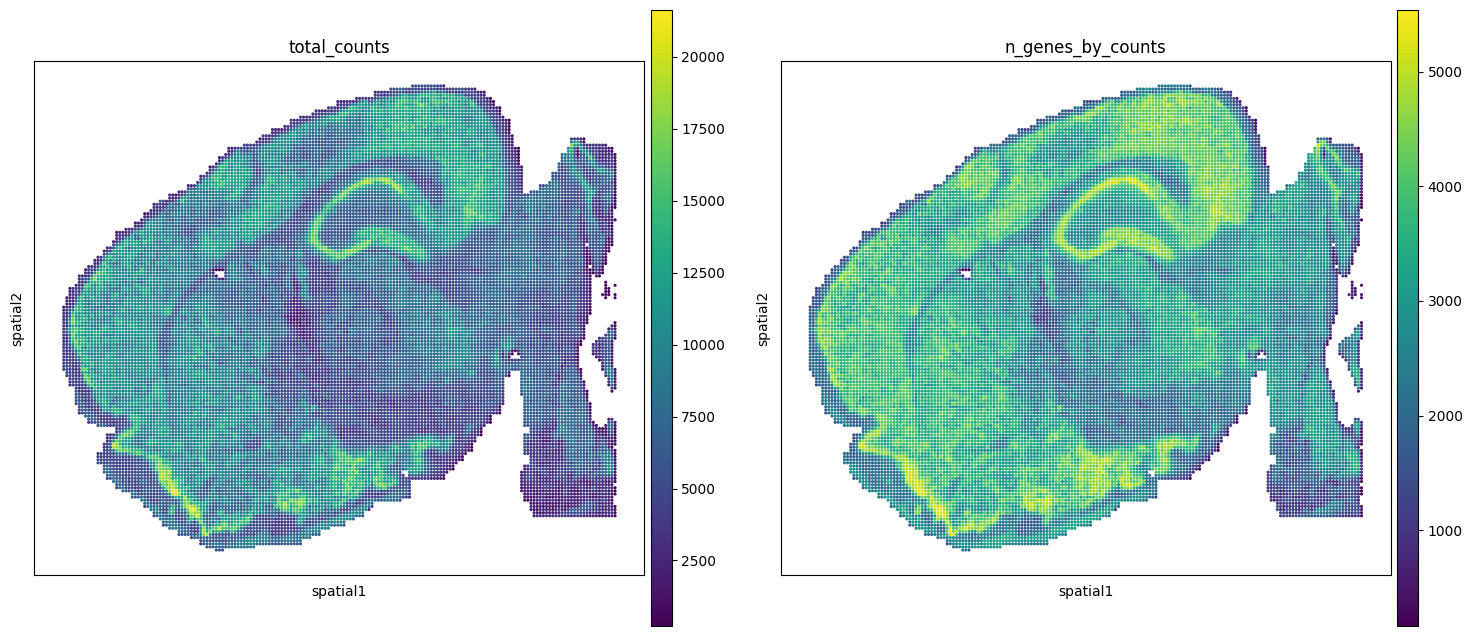

In [15]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, color=["total_counts", "n_genes_by_counts"], img_key = None, spot_size = 100)

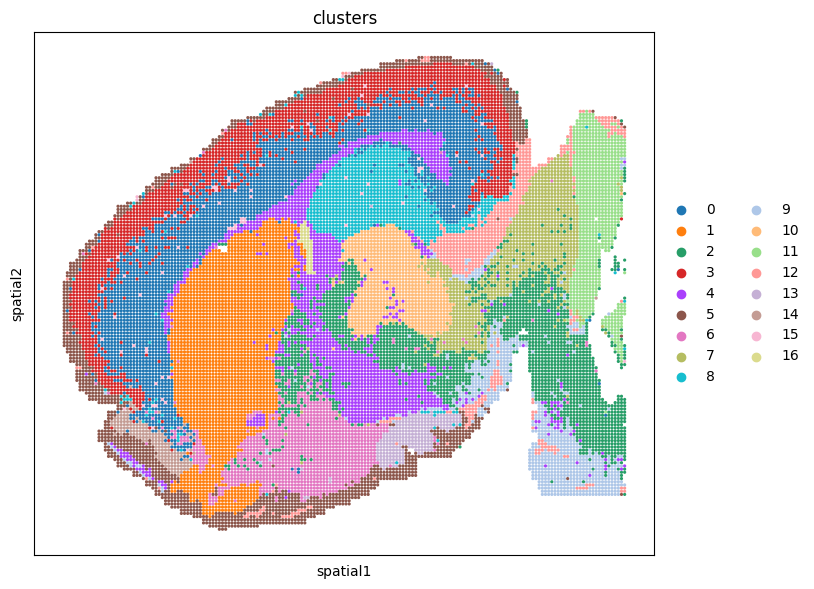

In [16]:
sc.pl.spatial(adata, color=["clusters"], img_key = None, spot_size = 100)

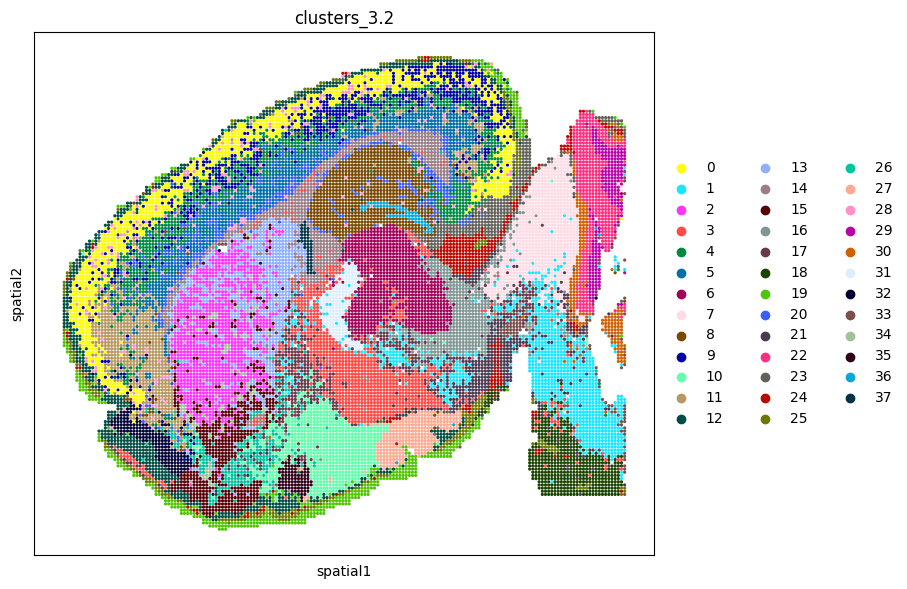

In [17]:
res = 3.2
sc.tl.leiden(adata, key_added="clusters_" + str(res), resolution = res)
sc.pl.spatial(adata, color=["clusters_" + str(res)], img_key = None, spot_size = 100)

In [18]:
adata.write_h5ad('../data/spf_mouse_brain_bin100_scanpy_cluster.h5ad')

In [19]:
adata.obs.to_csv('../data/spf_mouse_brain_bin100_scanpy_obs.csv')